# Qiskitチュートリアルのチュートリアル

この記事は[量子コンピュータ Advent Calendar 2018](https://qiita.com/advent-calendar/2018/quantum)の5日目の記事です。
昨日は@stwhaboutさんの「[Quantum Katas で始める量子コンピュータ入門 |6⟩: Simon's Algorithm](https://qiita.com/stwhabout/items/04105d054b739914d478)」でした。
明日は宇津木健さんが「[2018年の量子コンピュータ関連のニュースに一言ずつ！]()」書いてくれる予定です。


こんにちは、京都大学大学院で量子情報・量子コンピュータの研究をしている博士課程学生の[濵村一航](https://qinfo.tech)と申します。
この記事ではIBMの量子コンピュータ向けライブラリであるQiskitについて紹介していきます。

最初に僕とQiskitについて書きます。
IBMの量子コンピュータは、クラウドで利用可能になった2016年から使用していましたが、僕がQiskitというライブラリに出会ったのは今年のIBM東京基礎研究所でインターンでのことでした。
インターンでがっつりコードを読んだりプルリクを出したりしました。
インターン終了後もちょこちょこなんかしています。
(最近忙しくてちょっと活動力低下中)


そんな形で関わっているQiskitを[Qiskit Tutorials](https://github.com/Qiskit/qiskit-tutorial)というチュートリアルを紹介する形で書いていこうと思います。
この記事は、言うなればQiskit Tutorialsのチュートリアルです。
ちなみに、Qiskit Tutorialsは[Binder](https://mybinder.org/v2/gh/Qiskit/qiskit-tutorial/master?filepath=index.ipynb)から環境構築なしで試すことも出来ます。

## 2018年のQiskit

2018年はQiskitにとっても大きな飛躍の年でした。
最も目に付きやすいのはその名前の変更です。
以前は「Quantum Information Software Kit」を略して「QISKit」だったのですが、「Qiskit」になりました。
また、ライブラリが分割され、コアライブラリも「Qiskit SDK」から「Qiskit Core」、そして現在の「Qiskit Terra」となっています。
この「Terra」のリリースとほぼ同時に応用向けのライブラリである「QISKit ACQUA」(現在の「Aqua」)がリリースされました。
このAquaは化学やAI、最適化問題などへの量子コンピュータの応用をサポートしています。
もちろん、名前の変更だけでなくて、中身も大きく進化しています。
後方互換性を壊すような変更も入ったので古い解説記事のコードは動かなくなっています。
したがって、2018年の最後に現在の最新のQiskitの使い方を解説しておくのは意味があるのではないかと感じたので、Advent Calendarに参加して記事を書くことにしました。

## Qiskit Terraについて

冒頭でも述べましたが、Qiskitは量子コンピュータ用のライブラリです。
現在はQiskit Terra, Aquaがリリースされています。
今後はさらに量子誤り訂正や量子トモグラフィをサポートしたIgnis、高品質で高性能なシミュレータをサポートするAerがリリースされる予定です。
詳細は公式による記事[Qiskit and its Fundamental Elements
](https://medium.com/qiskit/qiskit-and-its-fundamental-elements-bcd7ead80492)にあるので、ここでの紹介はこのくらいにしておきます。

Qiskit TerraはQiskitの中心ともいえるライブラリです。
例えば、量子コンピュータで実行する操作のレシピを表した量子回路を作成し、その量子回路を量子コンピュータやシミュレータに投げて実行することが出来ます。
ではまず量子回路を実際に作成してみましょう。
[Quantum Circuits](https://github.com/Qiskit/qiskit-tutorial/blob/master/qiskit/terra/QuantumCircuits.ipynb)を参考にしています。
今回はQiskit Terraの執筆当時の最新版のQiskit Terra 0.6.1を使用しています。

最初に`state`という状態を準備する回路と`meaurement`という測定を表す回路を書いてみます。
量子回路は`+`演算子で連結することが出来ます。

In [1]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister

q = QuantumRegister(2)
c = ClassicalRegister(2)
state = QuantumCircuit(q, c)

state.x(q[1])
state.h(q[0])
state.cx(q[0], q[1])

measurement = QuantumCircuit(q, c)
measurement.measure(q, c);

In [2]:
%config InlineBackend.figure_format = 'svg'
from qiskit.tools.visualization import matplotlib_circuit_drawer, qx_color_scheme

#いい感じのスタイルを設定しています
style = qx_color_scheme()
style['compress'] = True
style['cregbundle'] = True
style['plotbarrier'] = True
circuit_drawer = lambda circuit: matplotlib_circuit_drawer(circuit, style=style)

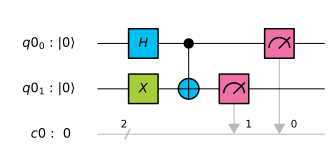

In [3]:
circuit = state + measurement
circuit_drawer(circuit)

なかなか、いい感じの量子回路図を書くことが出来ます。
これは内部的には`matplotlib`を用いて量子回路を描画しています。
実はQiskit 0.7以降ではアスキーアートで回路を表示する機能が導入され、さらに便利になる予定です。

実際に量子回路をシミュレータで計算して、結果を見てみましょう。
結果を可視化する部分はチュートリアルの[Ploting Data in Qiskit
](https://github.com/Qiskit/qiskit-tutorial/blob/master/qiskit/basics/plotting_data_in_qiskit.ipynb)が参考になります。

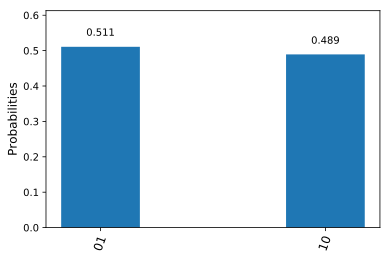

In [4]:
from qiskit import Aer
from qiskit import execute
from qiskit.tools.visualization import plot_histogram

backend = Aer.get_backend('qasm_simulator')
job = execute(circuit, backend)
result = job.result()
counts = result.get_counts(circuit)

plot_histogram(counts)

この結果をみると、`01`と`10`がほぼ同じくらいの確率で出ていることが分かります。

測定(上の量子回路図でいうピンクの箱)はその直前の量子状態の一部の情報しか引き出せません。
測定したときの量子状態がどんな状態だったのかが気になりますかもしれません。
この場合は`statevector_simulator`を使います。
`qasm_simulator`は量子コンピュータのシミュレーションが出来て、`statevector_simulator`は状態ベクトルという現実では出来ないような情報をシミュレートするものだと思ってください。

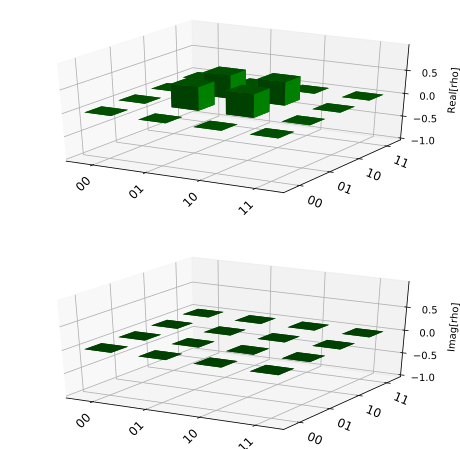

In [5]:
from qiskit.tools.visualization import plot_histogram, plot_state

backend = Aer.get_backend('statevector_simulator')
result = execute(state, backend).result()
state_vec  = result.get_statevector(state)
plot_state(state_vec, method='city')

状態ベクトルの要素は複素数なので実部と虚部があります。
せっかくなので他の状態の可視化もみてみましょう。

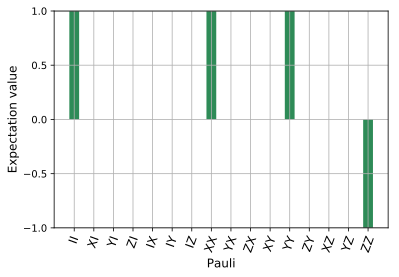

The 0th eigenvalue = 0.9999999999999999


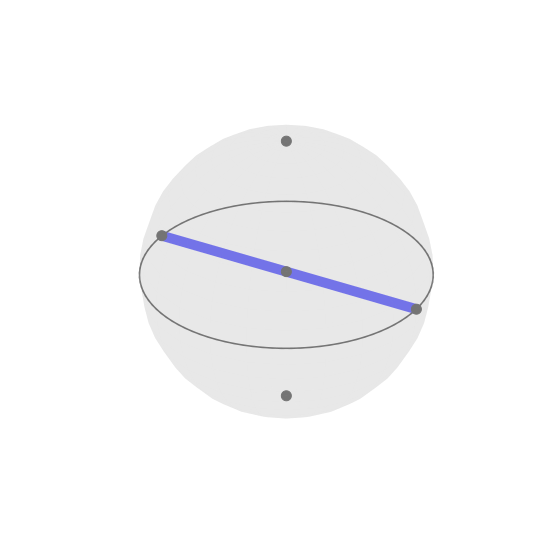

In [6]:
plot_state(state_vec, method='paulivec')
plot_state(state_vec, method='qsphere')

最初のグラフがパウリ演算子の期待値を表しています。
次の丸いグラフはQuantum Sphereとよばれるもので、Qiskitのロゴにもなっているやつです。

このように可視化のためのライブラリがいくつか準備されているのも、Qiskitの良さだと思います。

## Qiskit Aqua

Qiskit Aquaは化学、AI、最適化などをサポートしている応用向けのライブラリです。ここでは簡単に量子化学計算の例を紹介していきます。
量子コンピュータ Advent Calendar 2018の1日目の[量子コンピュータって何なの? 本当に速いの?
](https://qiita.com/gyu-don/items/52e5341e459535045127#vqe)でも紹介されていたVQEを用いて、水素分子($\mathrm{H}_2$)のエネルギーを計算してみましょう。
量子化学計算のオープンソースライブラリのPySCFを使います。
(これ以下のコードを動かすにはQiskit Aqua, Qiskit Aqua Chemistryの他にPySCFをインストールする必要があります。)

[Qiskit Aqua: Chemistry basic how to](https://github.com/Qiskit/qiskit-tutorial/blob/master/qiskit/aqua/chemistry/basic_howto.ipynb)と[Qiskit Aqua Chemistry: Experimenting with molecular ground state energy with variational quantum eigensolver](https://github.com/Qiskit/qiskit-tutorial/blob/master/qiskit/aqua/chemistry/dissociation_profile_of_molecule.ipynb)を参考にしました。
PySCF部分の設定の書き方は[Qiskit Aquaの公式のドキュメント](https://qiskit.org/documentation/aqua/aqua_chemistry_execution.html)を参考にしています。

In [7]:
from qiskit_aqua_chemistry import AquaChemistry
import numpy as np

aqua_chemistry_dict = {
    'driver': {'name': 'PYSCF'},
    'PYSCF': {'atom':  '', 'basis': 'sto3g'},
    'operator': {'name': 'hamiltonian', 'qubit_mapping': 'jordan_wigner'},
    'algorithm': {'name': 'VQE'},
    'optimizer': {'name': 'COBYLA'},
    'variational_form': {'name': 'UCCSD'},
    'initial_state': {'name': 'HartreeFock'},
    'backend': {'name': 'statevector_simulator'}
}

molecule = 'H .0 .0 -{0}; H .0 .0 {0}'

solver = AquaChemistry()

mol_distances = np.arange(0.2, 4.1, 0.1)
energy = np.zeros(len(mol_distances))

for i, distance in enumerate(mol_distances):
    aqua_chemistry_dict['PYSCF']['atom'] = molecule.format(distance/2)
    result = solver.run(aqua_chemistry_dict)
    energy[i] = result['energy']

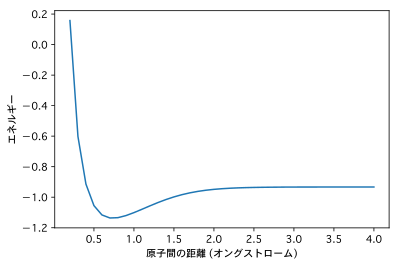

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Osaka'
plt.plot(mol_distances, energy)
plt.xlabel('原子間の距離 (オングストローム)')
plt.ylabel('エネルギー')
plt.show()

VQEで水素分子のエネルギーを分子間ごとに計算することが出来ました。
このグラフから0.7Åくらいが最もエネルギーが低いんだなということが分かります。

ここではシミュレータを使用しましたが、もちろん実機で計算することも出来ます。
Aqua Chemistryは量子アルゴリズムがよくわからなくても、サクッと計算が出来てしまう便利さがあります。

実際どういうふうに計算が行われているかは内部のコードを見れば分かりますし、研究のためにもっと細かい設定やアルゴリズムの改良をしたい場合には、こういった設定を辞書で渡す形じゃなくてちゃんとコードをいじって計算することもできます。
詳しくは、[Qiskit Aqua: Chemistry advanced how to](https://github.com/Qiskit/qiskit-tutorial/blob/master/qiskit/aqua/chemistry/advanced_howto.ipynb)などを参考にしてください。

## まとめ

今回はQiskit Tutorialsのチュートリアルということで、Qiskit Tutorialについて簡単に紹介しました。
Qiskitの良さの一つはこのQiskit Tutorialsというチュートリアルが充実していることだと思っています。
量子コンピュータのことはよく知らなくても、Qiskit Tutorialsを読むことで、コードの側面から量子コンピュータを勉強することが出来ます。
ただ、英語なので、少し大変かもしれません。
量子コンピュータのソフトウェア開発は今のところ海外のほうが盛んなので、今はどのライブラリも英語のものが多いです。
2019年、これらのライブラリの日本語訳が充実してくるか、あるいは国産のライブラリが充実してくるかは楽しみなところです。

Qiskit Tutorialsには公式が用意したチュートリアルの他にも、様々なチュートリアルがあります。
ぜひ、面白そうなチュートリアルを探してみてください。
[昨日のアドベントカレンダー](https://qiita.com/stwhabout/items/04105d054b739914d478)で紹介されていた[SimonのアルゴリズムのQiskit版のチュートリアルもあります](https://github.com/Qiskit/qiskit-tutorial/blob/master/community/algorithms/simon_algorithm.ipynb)。
僕が書いたチュートリアルもありますが、それはとてもマニアックな内容なのでここに書くのはやめておきます……

ここまで読んでいただいた方は、どうもありがとうございました。
それでは、よいクリスマスと量子生活をお過ごしください。